In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
from skimage.feature import hog
import cv2, os, glob, math

In [2]:
def create_data(filename, px):
    data = []
    for jpg in glob.glob("images/" + filename + "/*.jpg"):
        img = np.array(mpimg.imread(jpg))
        img = cv2.resize(img, (px, px))
        fd = hog(img)
        data.append(fd)
        
    return data

def data_split(rate, array):
    l = len(array)
    n_train = math.floor((1-rate) * l)
    train = array[:n_train]
    test = array[n_train:]
    
    return train, test

def create_label(array, label1, label2):
    l = len(array)
    new_array = []
    for i in range(l):
        if i < l/2:
            new_array.append(label1)
        else:
            new_array.append(label2)
    
    return new_array

In [3]:
data_tigers = create_data("tigers", 64)[:500]
data_dolphins = create_data("dolphins", 64)[:500]

In [4]:
train_tigers, test_tigers = data_split(0.1, data_tigers)
train_dolphins, test_dolphins = data_split(0.1, data_dolphins)
X_train = [*train_tigers, *train_dolphins]
X_test = [*test_tigers, *test_dolphins]
y_train = create_label(X_train, 0, 1)
y_test = create_label(X_test, 0, 1)

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():
    
    def __init__(self, lr = 0.001, iters = 1000):
        self.lr = lr
        self.iters = iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for i in range(self.iters):
            preds = sigmoid(np.dot(X, self.w) + self.b)
            
            self.w = self.w - self.lr * (1/n_samples) * np.dot(X.T,(preds - y))
            self.b = self.b - self.lr * (1/n_samples) * np.sum(preds - y)
        
    
    def predict(self, X):
        y_pred = sigmoid(np.dot(X, self.w) + self.b)
        label_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return label_pred
    
    def plot_sigmoid(self, X):
        lin_preds = np.dot(X, self.w) + self.b
        y_pred = sigmoid(lin_preds)
        import seaborn as sns
        sns.relplot(x = np.arange(1,len(y_pred)+1), y = np.sort(y_pred), kind = 'line')
    
    def score(self, y_pred, y_test):
        return np.sum(y_pred == y_test) / len(y_test)

In [14]:
log = LogisticRegression(lr = 0.01, iters = 1000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(log.score(y_pred, y_test))

0.87


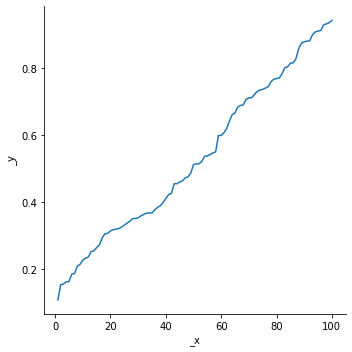

In [15]:
log.plot_sigmoid(X_test)

In [9]:
n_iters = [250, 500, 750, 1000, 1250, 1500, 1750, 2000]
loss = []

for n in n_iters:
    log = LogisticRegression(lr = 0.01, iters = n)
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)
    loss.append(1 - log.score(y_pred, y_test))

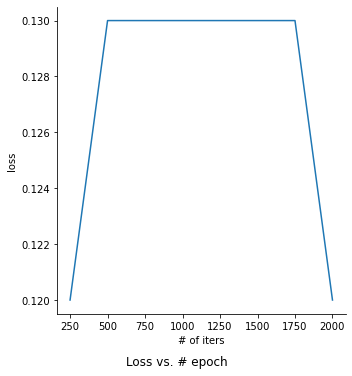

In [10]:
import seaborn as sns
g = sns.relplot(x = n_iters, y = loss, kind = 'line')
g.fig.suptitle('Loss vs. # epoch', y = 0)
g.set(xlabel = '# of iters', ylabel = 'loss')

In [11]:
lrs = [0.001, 0.005, 0.01, 0.02, 0.025, 0.05, 0.075, 0.1]
loss = []

for lr in lrs:
    log = LogisticRegression(lr = lr, iters = 1000)
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)
    loss.append(1 - log.score(y_pred, y_test))

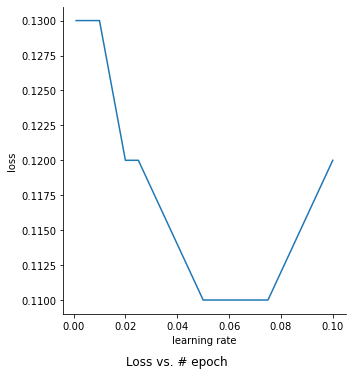

In [12]:
import seaborn as sns
g = sns.relplot(x = lrs, y = loss, kind = 'line')
g.fig.suptitle('Loss vs. # epoch', y = 0)
g.set(xlabel = 'learning rate', ylabel = 'loss')